In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 7.2MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219248 sha256=4058c22e7e0a36226e40bf5461960623511799eccae645956c259ee81a5e9bcd
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(6)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDKQK, KDKQKK, DKQKKK, KQKKKK, QKKKKE, KKKKE...","[MAKASR, AKASRH, KASRHN, ASRHNL, SRHNLS, RHNLS..."
1,"[MSWSGL, SWSGLL, WSGLLH, SGLLHG, GLLHGL, LLHGL...","[MQHVTG, QHVTGS, HVTGSK, VTGSKR, TGSKRR, GSKRR..."
2,"[MSLFDL, SLFDLF, LFDLFR, FDLFRG, DLFRGF, LFRGF...","[MAELPA, AELPAK, ELPAKR, LPAKRR, PAKRRF, AKRRF..."
3,"[MAVAPR, AVAPRL, VAPRLF, APRLFG, PRLFGG, RLFGG...","[MRIFAI, RIFAIS, IFAISC, FAISCS, AISCSS, ISCSS..."
4,"[MSTIQS, STIQSE, TIQSET, IQSETD, QSETDC, SETDC...","[MSYAFP, SYAFPG, YAFPGT, AFPGTF, FPGTFP, PGTFP..."
...,...,...
6265,"[MSYFGE, SYFGEH, YFGEHF, FGEHFW, GEHFWG, EHFWG...","[MITTDG, ITTDGN, TTDGNS, TDGNSA, DGNSAV, GNSAV..."
6266,"[MTVGKS, TVGKSS, VGKSSK, GKSSKM, KSSKML, SSKML...","[MSQPPF, SQPPFW, QPPFWQ, PPFWQQ, PFWQQK, FWQQK..."
6267,"[MNNLSF, NNLSFS, NLSFSE, LSFSEL, SFSELC, FSELC...","[MSEDRH, SEDRHQ, EDRHQQ, DRHQQR, RHQQRQ, HQQRQ..."
6268,"[MAPEIN, APEINL, PEINLP, EINLPG, INLPGP, NLPGP...","[MKNLSF, KNLSFV, NLSFVA, LSFVAG, SFVAGL, FVAGL..."


Median length of Human sequence is 475


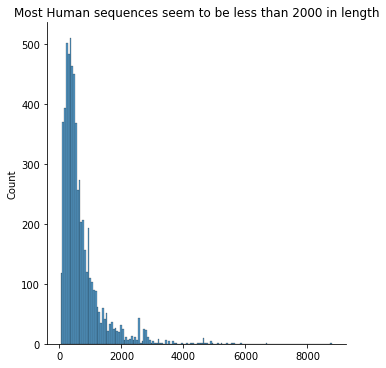

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 332


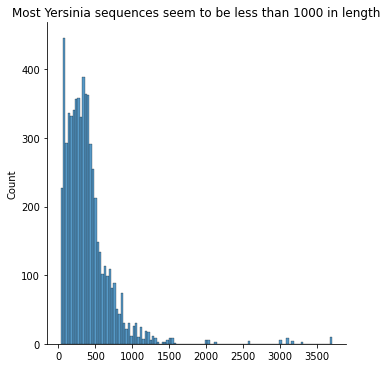

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 500
max sequences1_train length: 5630
min sequences1_train length: 0
median sequences1_train length: 199


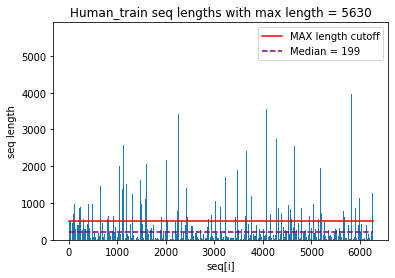

max word index sequences1_train: 849999
max sequences2_train length: 3705
min sequences2_train length: 0
median sequences2_train length: 329


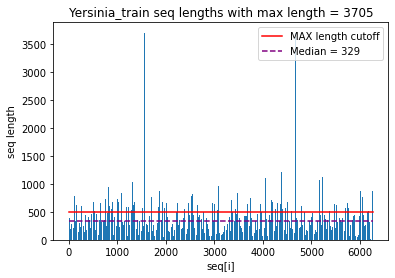

max word index sequences2_train: 849999
Found 2438322 unique tokens in tokenizer1.
Found 864366 unique tokens in tokenizer2.
Center padding
Shape of data1 tensor: (6270, 500)
Shape of data2 tensor: (6270, 500)
max test_sequences1 length: 5630
min test_sequences1 length: 0
median test_sequences1 length: 70


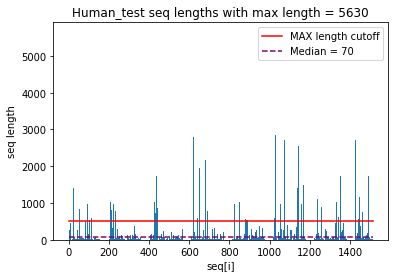

max test_sequences2 length: 3705
min test_sequences2 length: 0
median test_sequences2 length: 284


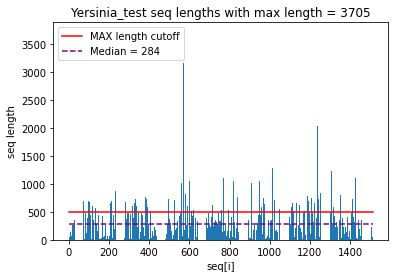

Center padding for test seq.
Shape of test_data1 tensor: (1514, 500)
Shape of test_data2 tensor: (1514, 500)
num_words is 850000


In [3]:
data1_6D_doubleip,data2_6D_doubleip,data1_test_6D_doubleip,data2_test_6D_doubleip,num_words_6D,MAX_SEQUENCE_LENGTH_6D,MAX_VOCAB_SIZE_6D = f.get_seq_data_doubleip(850000,500,df_train,df_test,show=True)

In [5]:
EMBEDDING_DIM = 10
embedding_layer1_6D = f.embedding_layer(num_words_6D,MAX_SEQUENCE_LENGTH_6D,EMBEDDING_DIM = EMBEDDING_DIM)
embedding_layer2_6D = f.embedding_layer(num_words_6D,MAX_SEQUENCE_LENGTH_6D,EMBEDDING_DIM = EMBEDDING_DIM)
embedding_layer_6D_join = f.embedding_layer(num_words_6D,MAX_SEQUENCE_LENGTH_6D,EMBEDDING_DIM = EMBEDDING_DIM)
BATCH_SIZE = 128
EPOCHS = 5
M_6D=20
DROPOUT = 0.1

In [10]:
x1_6D = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_6D, EMBEDDING_DIM, num_words_6D, M_6D,DROPOUT)
x2_6D = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_6D, EMBEDDING_DIM, num_words_6D, M_6D,DROPOUT)

concatenator = Concatenate(axis=1)
y = concatenator([x1_6D.output, x2_6D.output])
y = Dense(128, activation='relu')(y)
y = Dropout(DROPOUT)(y)
output = Dense(1, activation="sigmoid")(y)

model6D_doubleip = Model(inputs=[x1_6D.input, x2_6D.input], outputs=output)

model6D_doubleip.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


#model.summary()

print('Training model...')
jk = model6D_doubleip.fit(
  [data1_6D_doubleip,data2_6D_doubleip],
  df_train['label'].values,
  batch_size=128,
  epochs=EPOCHS,
  validation_data = ([data1_test_6D_doubleip,data2_test_6D_doubleip],df_test['label'].values),
  verbose=1
)

yhat =  model6D_doubleip.predict([data1_test_6D_doubleip,data2_test_6D_doubleip])
y = df_test['label'].values
print(roc_auc_score(y, yhat))

Training model...
Epoch 1/5
49/49 [==============================] - 14s 192ms/step - loss: 0.7022 - accuracy: 0.5622 - val_loss: 0.4219 - val_accuracy: 0.8203
Epoch 2/5
49/49 [==============================] - 8s 169ms/step - loss: 0.2806 - accuracy: 0.8895 - val_loss: 0.4811 - val_accuracy: 0.7946
Epoch 3/5
49/49 [==============================] - 8s 168ms/step - loss: 0.1092 - accuracy: 0.9579 - val_loss: 0.7860 - val_accuracy: 0.7715
Epoch 4/5
49/49 [==============================] - 8s 169ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.6443 - val_accuracy: 0.8045
Epoch 5/5
49/49 [==============================] - 8s 168ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.6293 - val_accuracy: 0.8170
0.9039855230530025


In [ ]:
#model6D_doubleip.save('/content/drive/MyDrive/ML_Data/model6D_doubleip.h5')